<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_5/5_1_Exploratory_Data_Analysis_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Univariate 


---

## Univariate EDA 

Univariate = single variable. In this notebook we are going to  describe and understand numeric and categorical varaibles. Specifically, for numeric data we are interested in the distribution of the data and calculate mean, median, mode, range and standard deviation as well as number of missing values (nulls); with categorical data we are interested in frequency analysis performing frequency counts by level, null counts, frequency percentages and unique-counts of the variable. 



## Numeric Variables:
-	Descriptive Statistics:
  - count
  - null count / pct 
  - unique,
  - min
  - mean
  - max
  - standard deviation

- Visualizations:
  - boxplot
  - histogram


## Categorical Variables:
-	Frequency Analysis:
  - count
  - null count / pct 
  - uninique
  - top (mode) / top pct 

- Visualizations
  - barplot (frequency plot) 



---

You might ask what about dates, times, text and other vairable types? Dates and times we will treat as continous numeric variables, text we'll ignore for now, and other varaiable types (arrays, lists, dictionaries, images, etc). 


---



## About the Data

Today's data comes from [Hunter's Hometown foods](https://www.huntershometownfoods.com/shop/home). "An up-and-coming new generation lifestyle brand". The are a locally owned store located in the Bordeaux community of Tennessee. Home of the Pick 5 meat sale and freshest vegetables in town! We offer lottery, and WIC and food stamps are accepted for in store purchases. They have a brand presence in 10 counties in Tennessee and are always looking for new ways to improve and anticipate customer needs. 

It's a somewhat large file, unzipped it's over 125MB here we are going to use the `compression = "zip"` optoin in `pd.read_csv()` method like this:

```python
import python as pd

# file location this happens to be on github
file_loc = "https://github.com/MonkeyWrenchGang/MGTPython/blob/main/module_4/data/ECommerce_consumer_behaviour.csv.zip?raw=true"

# read the file using read_csv
df = pd.read_csv(file_loc, compression="zip")

# eyeball the first several records
df.head()
```

### Description of the Data

|column | description |
|--------------- |----------------------- | 
|order_id | A unique number to identity the order|
|user_id | A unique number to identify the user |
|order_number | Number of the order |
|order_dow | order day of week 0 = sunday 6 = saturday|
|order_hour_of_day | hour of the day of the order |
|days_since_prior_order | number of days since a previous order |
|product_id| product identifier |
|add_to_cart_order | number of items added to a cart |
|reordered | If the reorder took place |
| department_id | Unique number allocated to each department |
|department| name of the department |
|product_name | highlevel product category name |




In [1]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
# file location this happens to be on github
file_loc = "https://github.com/MonkeyWrenchGang/MGTPython/blob/main/module_4/data/ECommerce_consumer_behaviour.csv.zip?raw=true"

# read the file using read_csv
grocery = pd.read_csv(file_loc, compression="zip")

# eyeball the first several records
grocery.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


## EDA: Descriptive Statistics for Numeric Variables


---

The `describe()` method in  pandas is used to generate descriptive statistics for a DataFrame. It will generate count, min,max, mean, and quartiles for us. What it doesn't generate is the number of nulls or unique items let's see how we can add these to our result. 

1. create a summary_stat dataframe using `describe()` then pivot it using `.T` for transpose. 
  ```python
# create summary stat dataframe 
summary_stat = grocery.describe().T

  ```

2. then add dtypes, nulls, nuinique to it. 
  ```python
  # dtypes
  summary_stat["dtype"] = grocery.dtypes
  # null count by column 
  summary_stat['null_count'] = grocery.isnull().sum()
  # unique count by column
 summary_stat['unique'] = grocery.nunique()
  
  ```

3. add the percentage null and unique to the datafame 
  ```python
  # calc % null 
  summary_stat['null_pct'] = summary_stat['null_count'] / grocery.shape[0]
  # calc % unique 

  summary_stat['unique_pct'] = summary_stat['unique'] / grocery.shape[0]
  ```
  - NOTE: `.shape[0]` returns the total number of rows (obeservations) in the dataframe
4. finally, output it! 
  ```python
  summary_stat
  ```


---


Step 1. of EDA is to get a feel and understanding of the numeric data once it's been imported. What exactly does that mean? Here we want to minimally understand the following: 

1. which columns conain nulls
  - is there sufficent null percentage to remove the column?
  - is it infrequent? and posibly replaceable
2. which columns are unique or nearly unique? 
  - are they likely identifiers? in which case the mean, and range aren't likely to be useful
3. which columns contain just a few unique values (ex. 7 unique values) 
  - are these likely to be categorical values stored as a numeric data type? 
4. what columns are likely to contain extreeme values? 
5. what columns are likely to be imported with the wrong data type?  
  - dates imported as numbers or character values
  - numeric data imported as character 
  - categorical data imported as numeric 
  - binary data imported as character 

and much more... 




In [3]:
# -- numeric data -- 
summary_stat = grocery.describe().T
summary_stat["dtype"] = grocery.dtypes
summary_stat['null_count'] = grocery.isnull().sum()
summary_stat['unique'] = grocery.nunique()
summary_stat['null_pct'] = summary_stat['null_count'] / grocery.shape[0]
summary_stat['unique_pct'] = summary_stat['unique'] / grocery.shape[0]
summary_stat

summary_stat.to_csv("summary_stat.csv")

## Key Questions for Numeric EDA


---
1. what variables (if any) can I ignore
2. what variables (if any) were imported incorrectly 
3. what variables (if any) should i treat as categories 
4. what variables (if any) likely contain extreme values
5. what variables (if any) likely have a surrogate value for nulls? 



## EDA - Frequency Analyiss for Categorical Variables
The describe(include="object") method in pandas is used to generate frequency counts  of categorical variables in the DataFrame. It will generate count, unique,top, and freq(of top) for us. What it doesn't gnerate is the number of nulls, or percentage of nulls and unique for us. Let's see how we can add these to our result.


1. creatre a summary_freq table using `.describe(include="object")` and `.T` to transpose it
  ```python
summary_freq = grocery.describe(include="object").T
  ```
2. then add dtypes and nulls to it.
  ```python
  # dtypes
  summary_freq["dtype"] = grocery.dtypes
  # null count by column 
  summary_freq['null_count'] = grocery.isnull().sum()
  ````
3. add the percentage null and unique to the datafame
  ```python
  # calc % null 
  summary_freq['null_pct'] = summary_freq['null_count'] / grocery.shape[0]
  # calc % unique 
  summary_freq['nunique_pct'] = summary_freq['nunique_count'] / grocery.shape[0]
  # calc % top freq
  summary_freq['freq_pct'] = summary_freq['freq'] / grocery.shape[0]
  ```
4. output the summary_freq 
  ```python
  # -- output -- 
  summary_freq
  ```



---
Just like our analysis of numieric data we are interested in understanding 
1. what variables (if any) were imported as character but should be numeric 
2. what variables (if any) can we drop
  - contain mostly nulls
  - contain a single value 
  - contain unique values 
3. what variables (if any) likely contain junk

and much more...



In [23]:
summary_freq = grocery.describe(include="object").T
# dtypes
summary_freq["dtype"] = grocery.dtypes
# null count by column 
summary_freq['null_count'] = grocery.isnull().sum()
# calc % null 
summary_freq['null_pct'] = summary_freq['null_count'] / grocery.shape[0]
# calc % unique 
summary_freq['unique_pct'] = summary_freq['unique'] / grocery.shape[0]
summary_freq['freq_pct'] = summary_freq['freq'] / grocery.shape[0]
summary_freq.to_csv("summary_freq.csv")

## EDA - What's Next? 


---

First we want to figure out whether a variable is an identifier, should be dropped, and is continous numeric or cateogrical variable. Then we want to figure out what we can ignore and what we should analyze. Looking at both the data dictionary and the two summary stat & freq tables we can conclude the following: 

|column | varaible type | description |
|--------------- | ------ |----------------------- | 
|order_id | identifier - ignore| A unique number to identity the order|
|user_id | identifier - ignore | A unique number to identify the user |
|order_number | identifier - ignore | Number of the order |
|order_dow | category | order day of week 0 = sunday 6 = saturday|
|order_hour_of_day | categorical or continous? | hour of the day of the order |
|days_since_prior_order | continous | number of days since a previous order |
|product_id| category - ignore |product identifier  |
|add_to_cart_order | continous| number of items added to a cart |
|reordered | category / binary| If the reorder took place |
| department_id | category - ignore | Unique number allocated to each department |
|department | category| name of the department |
|product_name | category | highlevel product category name |

Basically ignore identifers, if there are a low cardinalty numeric column treat it like a category (ex. day of week) so we really only have two continous numeric varaiables of interest: 
- days_since_prior_order
- add_to_cart_order

and a handful of categories 
- order_dow
- reordered
- department 
- product_name 

we have one that's on the fence which could be treated as continous or categorical? (maybe) 
- order_hour_of_day

We will ignore identifiers variables for the most part. 



# EDA - Visualize Numeric Variables 


---
- boxplot
- histogram 


## EDA Boxplots - Numeric Continous Variables

Here is the basic template: 
```python
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a boxplot of the 'price' column
sns.boxplot(x=df['numeric column'])

# Add a title to the plot
plt.title("Boxplot of numeric column ")

# Add labels to the x and y axis
plt.xlabel("numeric column ")
plt.ylabel(" ")

# Show the plot
plt.show()
```

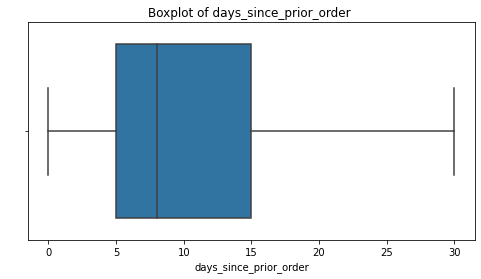

In [5]:
# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a boxplot of the 'price' column
sns.boxplot(x=grocery['days_since_prior_order'])

# Add a title to the plot
plt.title("Boxplot of days_since_prior_order ")

# Add labels to the x and y axis
plt.xlabel("days_since_prior_order")
plt.ylabel(" ")

# Show the plot
plt.show()

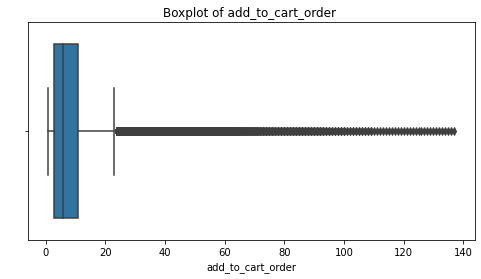

In [6]:
# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a boxplot of the 'price' column
sns.boxplot(x=grocery['add_to_cart_order'])

# Add a title to the plot
plt.title("Boxplot of add_to_cart_order ")

# Add labels to the x and y axis
plt.xlabel("add_to_cart_order")
plt.ylabel(" ")

# Show the plot
plt.show()

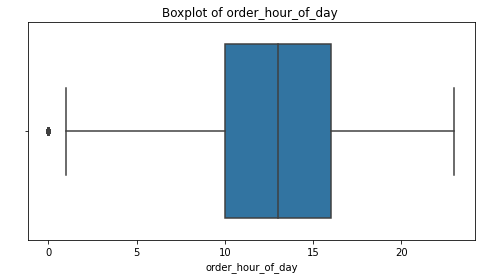

In [7]:
# order_hour_of_day

# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a boxplot of the 'price' column
sns.boxplot(x=grocery['order_hour_of_day'])

# Add a title to the plot
plt.title("Boxplot of order_hour_of_day ")

# Add labels to the x and y axis
plt.xlabel("order_hour_of_day")
plt.ylabel(" ")

# Show the plot
plt.show()

## EDA Histograms - Numeric Continous Variables

Here is the basic template: 

```python
# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a histogram of the 'price' column
sns.histplot(x=df['numeric variable'], 
             bins = 30)

# Add a title to the plot
plt.title("Histogram of a numeric variable ")

# Add labels to the x and y axis
plt.xlabel("numeric variable")
plt.ylabel(" ")

# Show the plot
plt.show()

```



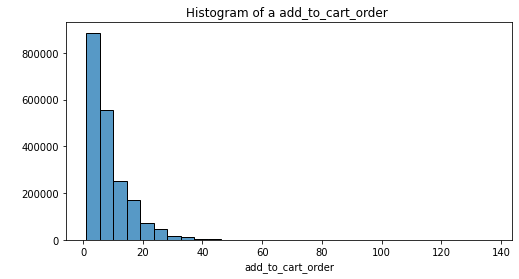

In [8]:
# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a histogram of column
sns.histplot(x=grocery['add_to_cart_order'], 
             bins = 30)

# Add a title to the plot
plt.title("Histogram of a add_to_cart_order ")

# Add labels to the x and y axis
plt.xlabel("add_to_cart_order")
plt.ylabel(" ")

# Show the plot
plt.show()

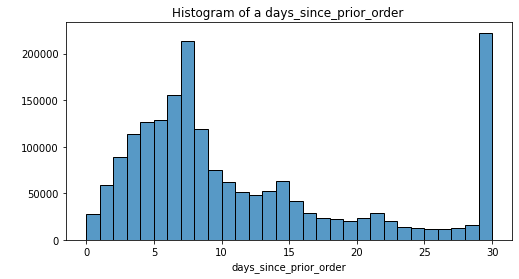

In [9]:
# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a histogram of column
sns.histplot(x=grocery['days_since_prior_order'], 
             bins = 30)

# Add a title to the plot
plt.title("Histogram of a days_since_prior_order ")

# Add labels to the x and y axis
plt.xlabel("days_since_prior_order")
plt.ylabel(" ")

# Show the plot
plt.show()

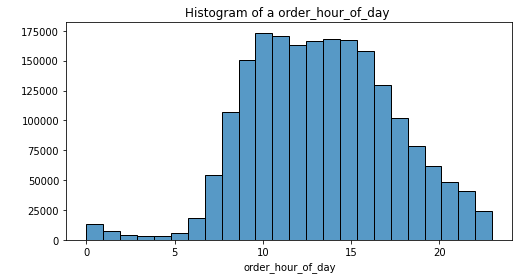

In [10]:
# order_hour_of_day
# Set the figure size
plt.figure(figsize=(8, 4))
# Plot a histogram of column
sns.histplot(x=grocery['order_hour_of_day'], 
             bins = 24)

# Add a title to the plot
plt.title("Histogram of a order_hour_of_day ")

# Add labels to the x and y axis
plt.xlabel("order_hour_of_day")
plt.ylabel(" ")

# Show the plot
plt.show()

### NOTE: Histogram Bins Matter

There are cases where the number of bins you use to divide your data into may change what the histogram indicates as the distribution.  There are several **suggestions** that can be used to determine the number of bins in a histogram, but they are just that **suggestions**. Here are some of the most common methods:

- The Square Root Rule: This rule suggests using the square root of the number of observations as the number of bins. For example, if you have 100 data points, you would use 10 bins.

- Sturges' Rule: This rule calculates the number of bins as log2(n) + 1, where n is the number of observations.

- Rice Rule: This rule calculates the number of bins as 2 * n^(1/3), where n is the number of observations.



---


Let's see this using the plt.subplots() function to compare side by side differences


In [11]:
# square root rule 
sqrt_rule = np.sqrt(grocery.shape[0])
print("sqrt_rule suggests.  : {:.0f}".format(sqrt_rule))

# sturges:  bins as log2(n) + 1, where n is the number of observations
sturges_rule = np.log2(grocery.shape[0]) + 1
print("sturges_rule suggests: {:.0f}".format(sturges_rule))

# rice:  2 * n^(1/3), where n is the number of observations.
rice_rule = 2 * grocery.shape[0]**(1/3)
print("rice_rule suggests.  : {:.0f}".format(rice_rule))

sqrt_rule suggests.  : 1421
sturges_rule suggests: 22
rice_rule suggests.  : 253


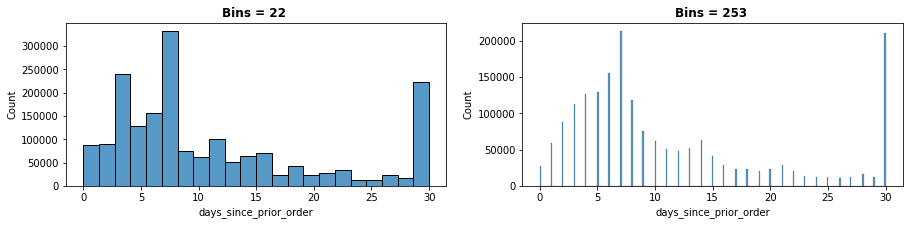

In [12]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

# create histograms assign the axes 
sns.histplot(x=grocery['days_since_prior_order'], 
             bins = 22,
             ax = axes[0])

sns.histplot(x=grocery['days_since_prior_order'], 
             bins = 253,
             ax = axes[1])

# title the axes 
axes[0].set_title('Bins = 22 ', 
             fontweight ="bold")
axes[1].set_title('Bins = 253 ', 
             fontweight ="bold")
# show
plt.show()



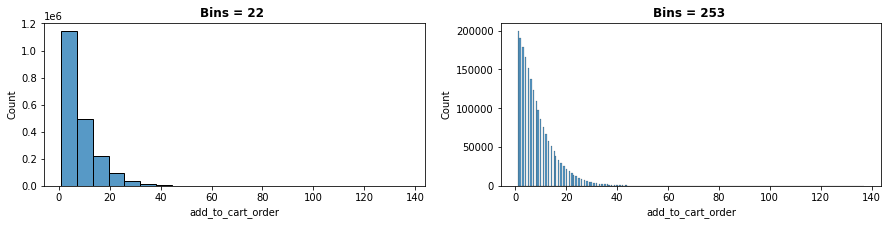

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

# create histograms assign the axes 
sns.histplot(x=grocery['add_to_cart_order'], 
             bins = 22,
             ax = axes[0])

sns.histplot(x=grocery['add_to_cart_order'], 
             bins = 253,
             ax = axes[1])

# title the axes 
axes[0].set_title('Bins = 22 ', 
             fontweight ="bold")
axes[1].set_title('Bins = 253 ', 
             fontweight ="bold")
# show
plt.show()

# EDA - Frequency Analysis Categorical Variables 



---

Here we want to "Count" or take the frequency of our categorical levels by variable. we can do this several ways. the easiest of course is to use `.value_counts()` 

let's see it in action with our categories:

- order_dow
- reordered
- department
- product_name



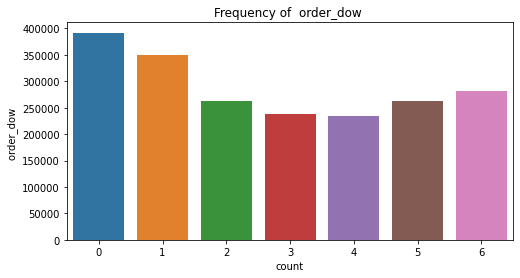

In [14]:
# Set the figure size
plt.figure(figsize=(8, 4))
# calculate the counts 
res1 = grocery["order_dow"].value_counts()
# make the plot 
sns.barplot(x=res1.index,y=res1)
# Add a title to the plot
plt.title("Frequency of  order_dow ")

# Add labels to the x and y axis
plt.xlabel("count")
plt.ylabel("order_dow ")

# show it
plt.show()

## Prep your Data

**I don't like 0s and 1s for day of week**! 

How can i tell what order of the week is mostly shopped? sunday monday but what's next? You probably don't either, here's how we can change this using the `.map()` method. 

```python
# 1st create a dictionary that maps integers to the days of the week
day_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# 2nd use the .map() method to map the numeris days of the week to names of week
df['day_of_week'] = df['day_of_week'].map(day_map)


```

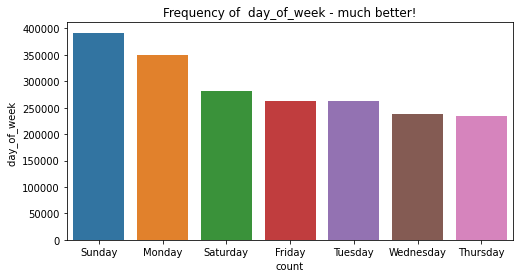

In [15]:
day_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# 2nd use the .map() method to map the numeris days of the week to names of week
grocery['day_of_week'] = grocery['order_dow'].map(day_map)
# Set the figure size
plt.figure(figsize=(8, 4))
# calculate the counts 
res1 = grocery["day_of_week"].value_counts()
# make the plot 
sns.barplot(x=res1.index,y=res1)
# Add a title to the plot
plt.title("Frequency of  day_of_week - much better!")

# Add labels to the x and y axis
plt.xlabel("count")
plt.ylabel("day_of_week ")

# show it
plt.show()

So we can infer that most people do their shopping on sunday and monday, least shopping days is wednesday and thursday. 

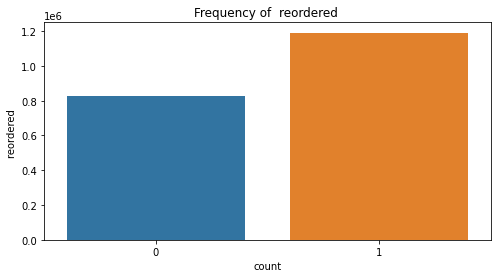

In [16]:
# Set the figure size
plt.figure(figsize=(8, 4))
# calculate the counts 
res1 = grocery["reordered"].value_counts()
# make the plot 
sns.barplot(x=res1.index,y=res1)
# Add a title to the plot
plt.title("Frequency of  reordered ")

# Add labels to the x and y axis
plt.xlabel("count")
plt.ylabel("reordered ")

# show it
plt.show()

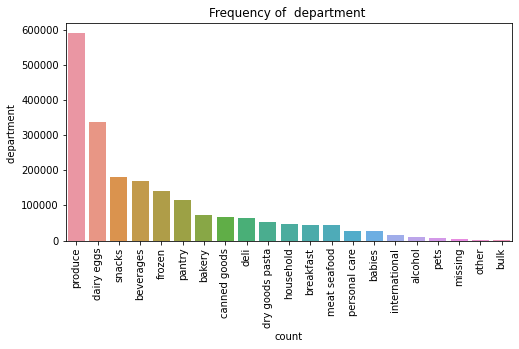

In [17]:
# Set the figure size
plt.figure(figsize=(8, 4))
# calculate the counts 
res1 = grocery["department"].value_counts()
# make the plot 
sns.barplot(x=res1.index,y=res1)
# Add a title to the plot
plt.title("Frequency of  department ")

# Add labels to the x and y axis
plt.xlabel("count")
plt.xticks(rotation=90)
plt.ylabel("department ")

# show it
plt.show()

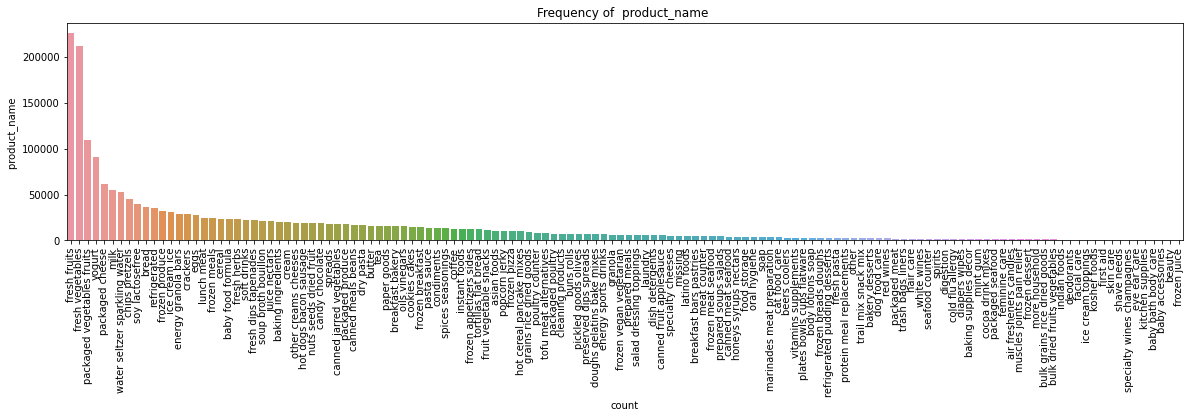

In [18]:
# Set the figure size
plt.figure(figsize=(20, 4))
# calculate the counts 
res1 = grocery["product_name"].value_counts()
# make the plot 
sns.barplot(x=res1.index,y=res1)
# Add a title to the plot
plt.title("Frequency of  product_name ")

# Add labels to the x and y axis
plt.xlabel("count")
plt.xticks(rotation=90)
plt.ylabel("product_name ")

# show it
plt.show()

# EDA - Anomaly Detection (Single Variable) 


---

Every statisticain will tell you to look for outliers using various statistical measures. My own professor was a big fan of z-scores and using the  interquartile range (IQR), to determine if a data point is an outlier. 

- A z-score is calculated by subtracting the mean of the data and dividing the result by the standard deviation. Data points with a z-score greater than 3 or less than -3 are considered outliers. 
- The IQR is calculated by subtracting the first quartile (25th percentile) from the third quartile (75th percentile). Data points that fall outside of 1.5 times the IQR are considered outliers.


The problem is that most statistical methods assume that the data is **normally distributed**, meaning that it follows a Gaussian distribution. For example, the z-score method uses the mean and standard deviation of the data to determine how many standard deviations a particular data point is away from the mean. If the data is skewed or doesn't follow a normal distribution the result is likely not useful. 

We are going to look at a few methods 

1. Z-SCORE: A z-score is calculated by subtracting the mean of the data and dividing the result by the standard deviation. Data points with a z-score greater than 3 or less than -3 are considered outliers. 
  - *NOTE: Likely your data is not normally distributed so the Z-score method may not be effective in identifying outliers.*

2. IQR : The IQR is calculated by subtracting the first quartile (25th percentile) from the third quartile (75th percentile). Data points that fall outside of 1.5 times the IQR are considered outliers.

3.  Local Outlier Factor (LOF) : Local Outlier Factor (LOF) is a machine learning algorithm used to identify outliers in a dataset. LOF calculates the deviation of each data point from its **neighbors**, and assigns a score to each data point based on how different it is from its neighbors. Points with a higher score are considered outliers, as they are significantly different from the surrounding points.

Lets take a look at all three methods. 



## Z-Score Method

In [19]:
# -- 1. Z-SCORE method -- 

# Calculate the mean and std for varaible 
mean = grocery["add_to_cart_order"].mean()
std = grocery["add_to_cart_order"].std()

# Calculate the Z-Score for varaible
grocery["add_to_cart_order_Z"] = (grocery["add_to_cart_order"] - mean) / std

# Set a threshold for deciding which points are outliers
threshold = 3


# Identify the outliers based on the threshold
outliers = grocery.query('abs(add_to_cart_order_Z) > @threshold')

# summarize the outliers
print("At a threshold of < -{} and > +{} we found: {} outliers or about {:.2f}% of dataset".format(
    threshold,
    threshold,
    outliers.shape[0],
    (outliers.shape[0]/grocery.shape[0])*100
))

At a threshold of < -3 and > +3 we found: 33188 outliers or about 1.64% of dataset


## IQR Method

In [20]:
# -- 2. IQR Method -- 

# Calculate the Q1 & Q3 quartiles of the data
Q1 = grocery["add_to_cart_order"].quantile(q=0.25)
Q3 = grocery["add_to_cart_order"].quantile(q=0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for deciding which points are outliers
threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

# Identify the outliers based on the threshold
outliers = grocery.query('add_to_cart_order < @lower_bound or add_to_cart_order > @upper_bound ')

# summarize the outliers
print("At a lower_bound < {} and upper_bound > {} we found: {} outliers or about {:.2f}% of dataset".format(
    lower_bound,
    upper_bound,
    outliers.shape[0],
    (outliers.shape[0]/grocery.shape[0])*100
))

At a lower_bound < -9.0 and upper_bound > 23.0 we found: 84751 outliers or about 4.20% of dataset


## Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) is an algorithm for identifying outliers in a data set. It works by comparing the **local density** of a data point to the **densities of its neighboring points**. A data point is considered an outlier if its local density is significantly lower than the densities of its neighbors.

The number of neighbors to consider when calculating the Local Outlier Factor (LOF) is an important parameter that can affect the results. A higher number of neighbors will make the LOF calculation more sensitive to the local density of the data, while a lower number of neighbors will make it more sensitive to individual outliers.

So how does it work? 

- Choose the value of **neighbors** that determines the number of nearest neighbors to use for density estimation.

  For each data point x , calculate the distances to its k (neighbors=) nearest neighbors: 

  - Calculate the distances from x to all other data points in the data set.

  - Find the k data points that are closest to x and consider these to be the nearest neighbors of x.

  - The density of x can be estimated as the inverse of the average distance from x to its k nearest neighbors: `density(x) = k / (sum of distances from x to its k nearest neighbors)`



---



The optimal number of neighbors to choose depends on the specific dataset and the desired outcome. As a rule, a value of k between 5 and 20 is often used, with a higher value for dense datasets and a lower value for sparse datasets. In some cases, it may be necessary to experiment with different values of k to find the one that provides the best results for a particular problem.

## NOTE: LOF like all KNN based algorithems is ***SLOW***

In [21]:
# -- 3. LOF -- 
from sklearn.neighbors import LocalOutlierFactor

# Create the LOF model
n_neighbors = 10
# Create a LocalOutlierFactor model
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.005 , novelty=True)

# extract the column into a Dataframe and take a sample. 
X = grocery[["add_to_cart_order"]].sample(n=100000)

# Fit the model to the data - "this is called training"
is_outlier = lof.fit(X)

# Predict the outliers in the full dataset 
grocery['outlier'] = lof.predict(grocery[["add_to_cart_order"]])

# Identify the outliers based on the threshold
outliers = grocery.query('outlier ==  -1 ')


# summarize the outliers
print("The LOF method we found: {} outliers or about {:.2f}% of dataset".format(
    outliers.shape[0],
    (outliers.shape[0]/grocery.shape[0])*100
))


The LOF method we found: 424 outliers or about 0.02% of dataset


# Conclusion


---

Here we dove into the world of ***somewhat*** formalized EDA. The goal of EDA is to get a feel for the data, identify which variables can be ignored, cleaned or dropped, spot patterns in the data requiring further analysis, and finally dig into potenital anomalies. 

Anomaly detection plays a crucial role in many industries, including finance, healthcare, cybersecurity, and more. It allows analysts to identify patterns in data that depart from typical behavior, potentially uncovering issues such as fraud, errors, or system failures.

We explored some of the methods used in anomaly detection, including statistical methods such as Z-score and IQR. The Local Outlier Factor algorithm, a machine learning method, is a straightforward but time-consuming approach to detect outliers and anomalies in large data sets. The method chosen depends on factors such as the type of data, complexity, and desired results.


